  [[[[[[[XXXXXXXXXXXXXXXXXXXX]]]]]]]]   --------------------------Deeksha Shandilya--------------------------[[[[[[[XXXXXXXXXXXXXXXXXX]]]]]]]]

## Goal : To predict the percentage of student based on the no. of study hours

- Working with the number of hours spent by student on studies and based on that how much scores were obtained by students. This is a simple linear regression task.

### Step - 1 :Loading the from CSV file into dataframe

In [1]:
#import all libraries required 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
df_s = pd.read_csv("student_dataset.csv")
print("Success : File imported ")

df_s.head(10)

Success : File imported 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


- Plotting graph out of the given data points in our dataset so I can get a visual overview and manually I can find relationship between the data points.

### Step - 2 : Data Visualitation

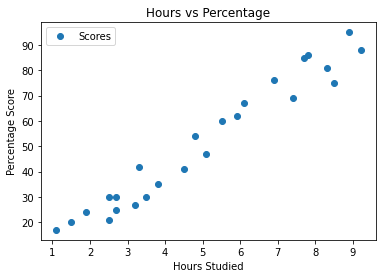

In [4]:
# Plotting the distribution of scores
df_s.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

- Based on the above graph we can clearly say that there exists a positive linear relation between the number of hours studied and percentage of score.

### Step - 3 : Splitting / Preparing the data  

- Preparing the data based on "Inputs" (Attributes) and "Outputs"(Labels)

In [9]:
X = df_s.iloc[:, :-1].values  
y = df_s.iloc[:, 1].values  

- Now we split this data into train and test sets by using Scikit-Learn's built-in method : "train_test_split()"

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### Step - 4 :Training the data

- We will train our model using X_train dataframe.Steps are as follows:

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Model Trained")

Model Trained


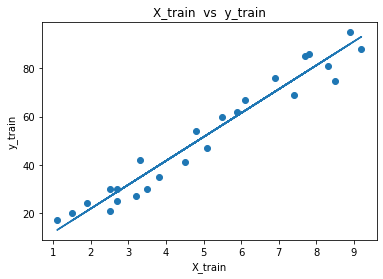

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('X_train  vs  y_train')  
plt.xlabel('X_train')  
plt.ylabel('y_train')  
plt.show()

### Step - 4 : Making Predictions

- After successfully training the model , now it's time to make some prediction out of test data.

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step -5 : Evaluating the model

- In this step,we evaluate the performance of algorithm and check how well algorithm perform on a particular dataset.For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


**Evaluation on the question which was provide ["What will be the predicted score if a student studies for 9.25hrs/day"]** 

- The X_test value we can chage to 9.25 hrs 

In [23]:
# You can also test with your own data
hours = [[9.25]]
#hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


- Answer : If someone studies continously for 9.25 hr they can actually achieve a good percentage.